# 2_skeleton

La idea es trar una imagen cualquiera que sea fácil de conseguir sus bordes y generar las coordenadas `x` y `y` para graficarlas en un osciloscopio analógico.

## Importar bibliotecas

In [89]:
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Leer imagen en escala de grises

Leer la imagen, esta imagen ya debe de tener bien definidos los bordes, de preferencia deberá de ser una imagen binaria con el fondo de color negro y las líneas deberán de ser de color blanco.

Is folder with pattern
/home/uli/Pictures/LainViernesbin_crop/LainViernesbin_crop2.jpg
/home/uli/Pictures/LainViernesbin_crop/LainViernesbin_crop1.jpg
/home/uli/Pictures/LainViernesbin_crop/LainViernesbin_crop3.jpg
images list size:  3
Image size:  (191, 203, 3)


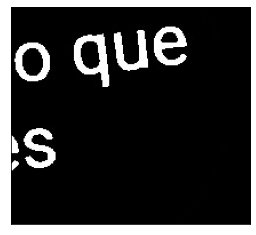

In [90]:
#path = "/home/uli/Pictures/LainViernesbin_crop.jpg" # single image
path = "/home/uli/Pictures/LainViernesbin_crop/LainViernesbin_crop*.jpg" # folder with pattern

files = glob.glob(path)

if os.path.isfile(path): # for a single static image
    print("Is file")
    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    print("Image size: ", image.shape)
elif os.path.isdir(path):
    print("Is directory")
else:
    # If your set of images is .jpg erase the bin.jpg or edge.jpg images if there is any.
    print("Is folder with pattern") # folder with pattern
    [print(file) for file in glob.glob(path)]
    images = [cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB) for file in glob.glob(path)]
    
    print("images list size: ", len(images))
    print("Image size: ", images[0].shape)

if len(files) == 1:
    plt.imshow(image,cmap="gray")
    plt.xticks([]), plt.yticks([])
else:        
    for image in images: 
        plt.figure()
        plt.imshow(image,cmap="gray")
        plt.xticks([]), plt.yticks([])

## Skeleton algorithm

* Convertir la iamgen a escala de grises
* Luego aplicar el algoritmo de adelgazamiento `Zhang-Suen` del paquete `opencv-contrib-python`

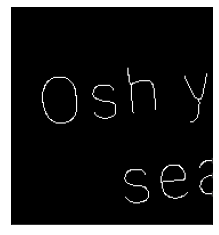

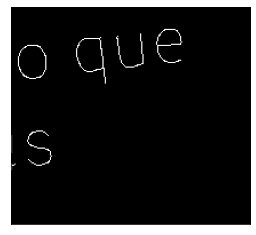

In [91]:
if len(files) == 1:
    thinned_image = cv2.ximgproc.thinning(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    plt.imshow(thinned_image,cmap = 'gray')
    plt.xticks([]), plt.yticks([])
else:
    thinned_images = [cv2.ximgproc.thinning(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)) for image in images]
    for image in thinned_images: 
        plt.figure()
        plt.imshow(image,cmap="gray")
        plt.xticks([]), plt.yticks([])

Graficar las imágenes de entrada y de salida.
Podemos notar que hay una menor cantidad de pixeles blancos por lo que requeriremos de menor tiempo para graficar la imagen.
Además no se pierde la forma del diseño de la imagen.

In [92]:
answer = input("Save thinned images? Yy/Nn: ") 
if answer == "Y" or answer == "y":
    if os.path.isfile(path): # for a single static image
        print(os.path.splitext(path)[0]+"skeleton.jpg")
        cv2.imwrite(os.path.splitext(path)[0]+"skeleton.jpg", thinned_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
    #elif os.path.isdir(path):
    else:
        for index,thinned_image in enumerate(thinned_images): # folder with pattern
            ## thinned_images in the same folder
            #print(os.path.splitext(files[index])[0]+"skeleton.jpg")
            #cv2.imwrite(os.path.splitext(files[index])[0]+"skeleton.jpg", thinned_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
            ## bin_images in bin folder
            if not os.path.exists(os.path.dirname(files[index])+'/skeleton'):
                os.makedirs(os.path.dirname(files[index])+'/skeleton')
            print(os.path.dirname(files[index])+"/skeleton/"+os.path.splitext(os.path.basename(files[index]))[0]+".jpg")
            cv2.imwrite(os.path.dirname(files[index])+"/skeleton/"+os.path.splitext(os.path.basename(files[index]))[0]+".jpg", thinned_image, [int(cv2.IMWRITE_PNG_COMPRESSION), 9])
        
    print("Thinned images saved")
elif answer == "N" or answer == "n": 
    print("Thinned images not saved")
else: 
    print("Please enter Y or y or N or n.")

Save thinned images? Yy/Nn:  y


/home/uli/Pictures/LainViernesbin_crop/skeleton/LainViernesbin_crop2.jpg
/home/uli/Pictures/LainViernesbin_crop/skeleton/LainViernesbin_crop1.jpg
/home/uli/Pictures/LainViernesbin_crop/skeleton/LainViernesbin_crop3.jpg
Thinned images saved
